# Task 1: Data Analysis and Preprocessing
In this section, we will focus on several crucial steps involved in analyzing and preprocessing transaction data to prepare it for model training. The key objectives include:

1. **Handling Missing Values**: We will impute or drop missing values to ensure our dataset is clean and usable.
  
2. **Data Cleaning**: This involves removing duplicate entries and correcting data types to maintain data integrity.

3. **Exploratory Data Analysis (EDA)**: Conducting univariate and bivariate analysis to understand the distribution of features and relationships between them.

4. **Merging Datasets for Geolocation Analysis**: We will convert IP addresses to integer format and merge the primary dataset with the geolocation dataset to enrich the data for fraud detection.

5. **Feature Engineering**: Creating features that reflect transaction frequency, velocity, and time-based characteristics, such as hour of day and day of week.

6. **Normalization and Scaling**: Preparing the data so that it is suitable for machine learning models.

7. **Encoding Categorical Features**: Converting categorical variables into a numerical format that can be utilized by our models.


In [1]:
import sys
import pandas as pd
scripts_dir = r'C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\scripts'
src_dir = r'C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\src'
# Load the datasets
fraud_data = pd.read_csv(r"C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\Fraud_Data.csv")
creditcard_data = pd.read_csv(r"C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\creditcard.csv")
ip_to_country = pd.read_csv(r"C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\IpAddress_to_Country.csv")
# output folder 
output_path = r"C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\Fraud_Data_Merged.csv"
output_future_engineered = r"C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\Fraud_Data.csv"
# Add directories to the Python path if they are not already included
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)

## Data Processing

#### 1.Display first few rows for each dataset
#### 2.Display basic statistics for numerical columns 
#### 3.Check dataset shape (rows, columns)
#### 4.Check for Missing values, duplication and handling    
#### 5.Class distribution for target variables

# import dependences

In [2]:
from data_processing import process_data #Data Processing
from data_analysis_EDA import perform_eda # Data_Analysis_EDA
from feature_engineering import feature_engineering

In [3]:
print("Fraud Data Head:")
fraud_data.head()


Fraud Data Head:


,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,purchase_hour,...,country_Unknown,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,22058,1424818549,1429325231,0.172414,QVPSPJUOCKZAR,1,0.679914,732758368,0,2,...,0,0,0,0,0,0,0,0,0,0
1,333320,1433709590,1433727534,0.048276,EOGFQPIZPYXFZ,0,2.304476,350311387,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1359,1420138364,1420138365,0.041379,YSSKYOSJHPPLJ,1,2.304476,2621473820,1,18,...,0,0,0,0,0,0,0,0,0,0
3,150084,1430255605,1430747690,0.241379,ATGTXKYKUDUQN,1,0.911994,3840542443,0,13,...,1,0,0,0,0,0,0,0,0,0
4,221365,1437462592,1441824053,0.206897,NAUITBZFJKHWW,1,1.376155,415583117,0,18,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("\nCredit Card Data Head:")
creditcard_data.head()



Credit Card Data Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("\nIP to Country Data Head:")
ip_to_country.head()


IP to Country Data Head:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
print("\nFraud Data Describe:")
fraud_data.describe()


Fraud Data Describe:


,user_id,signup_time,purchase_time,purchase_value,sex,age,ip_address,class,purchase_hour,transaction_frequency,...,country_Unknown,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
count,151112.000000,1.511120e+05,1.511120e+05,151112.000000,151112.000000,1.511120e+05,1.511120e+05,151112.000000,151112.000000,151112.0,...,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.00000,151112.000000,151112.000000,151112.000000,151112.000000
mean,200171.040970,1.429491e+09,1.434423e+09,0.192658,0.584288,7.673816e-17,2.152145e+09,0.093646,11.521593,0.0,...,0.145362,0.000529,0.000066,0.000007,0.001661,0.00364,0.000020,0.000007,0.000066,0.000040
std,115369.285024,5.930619e+06,7.042566e+06,0.126364,0.492846,1.000003e+00,1.248497e+09,0.291336,6.912474,0.0,...,0.352467,0.023003,0.008135,0.002572,0.040722,0.06022,0.004456,0.002572,0.008135,0.006301
min,2.000000,1.420070e+09,1.420070e+09,0.000000,0.000000,-1.756930e+00,5.209300e+04,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,100642.500000,1.424253e+09,1.429368e+09,0.089655,0.000000,-7.125683e-01,1.085934e+09,0.000000,6.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,199958.000000,1.429418e+09,1.434635e+09,0.179310,1.000000,-1.632727e-02,2.154770e+09,0.000000,12.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,300054.000000,1.434639e+09,1.439837e+09,0.275862,1.000000,6.799138e-01,3.243258e+09,0.000000,17.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,400000.000000,1.439873e+09,1.450235e+09,1.000000,1.000000,4.973400e+00,4.294850e+09,1.000000,23.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [7]:

print("\nCredit Card Data Describe:")
creditcard_data.describe()



Credit Card Data Describe:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Fraud Data Shape: (151112, 201)
Credit Card Data Shape: (284807, 31)
IP to Country Data Shape: (138846, 3)

Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Columns: 201 entries, user_id to country_Zimbabwe
dtypes: float64(4), int64(196), object(1)
memory usage: 231.7+ MB
None

Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12

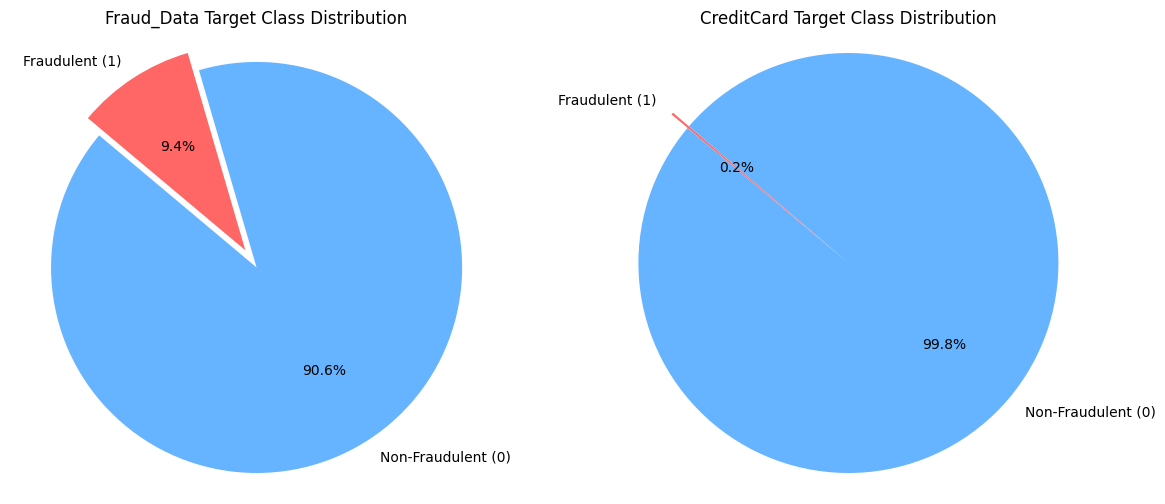

In [8]:
process_data(fraud_data, creditcard_data, ip_to_country)

## Explanatory Data Analysis(EDA)

#### 1. Univariate analysis
#### 2. Bivariate analysis
#### 3. Merge Datasets for Geolocation Analysis
#### 4. Correlation 


Starting exploratory data analysis (EDA)...

Plotting distributions for fraud_data...
Plotting 'purchase_value' histogram...
Plotting 'age' histogram...
Plotting 'source' bar chart...
Error plotting fraud_data distributions: Could not interpret value `source` for `x`. An entry with this name does not appear in `data`.

Plotting distributions for creditcard_data...
Plotting 'Time' histogram...
Plotting 'Amount' histogram...
Plotting 'Class' bar chart...


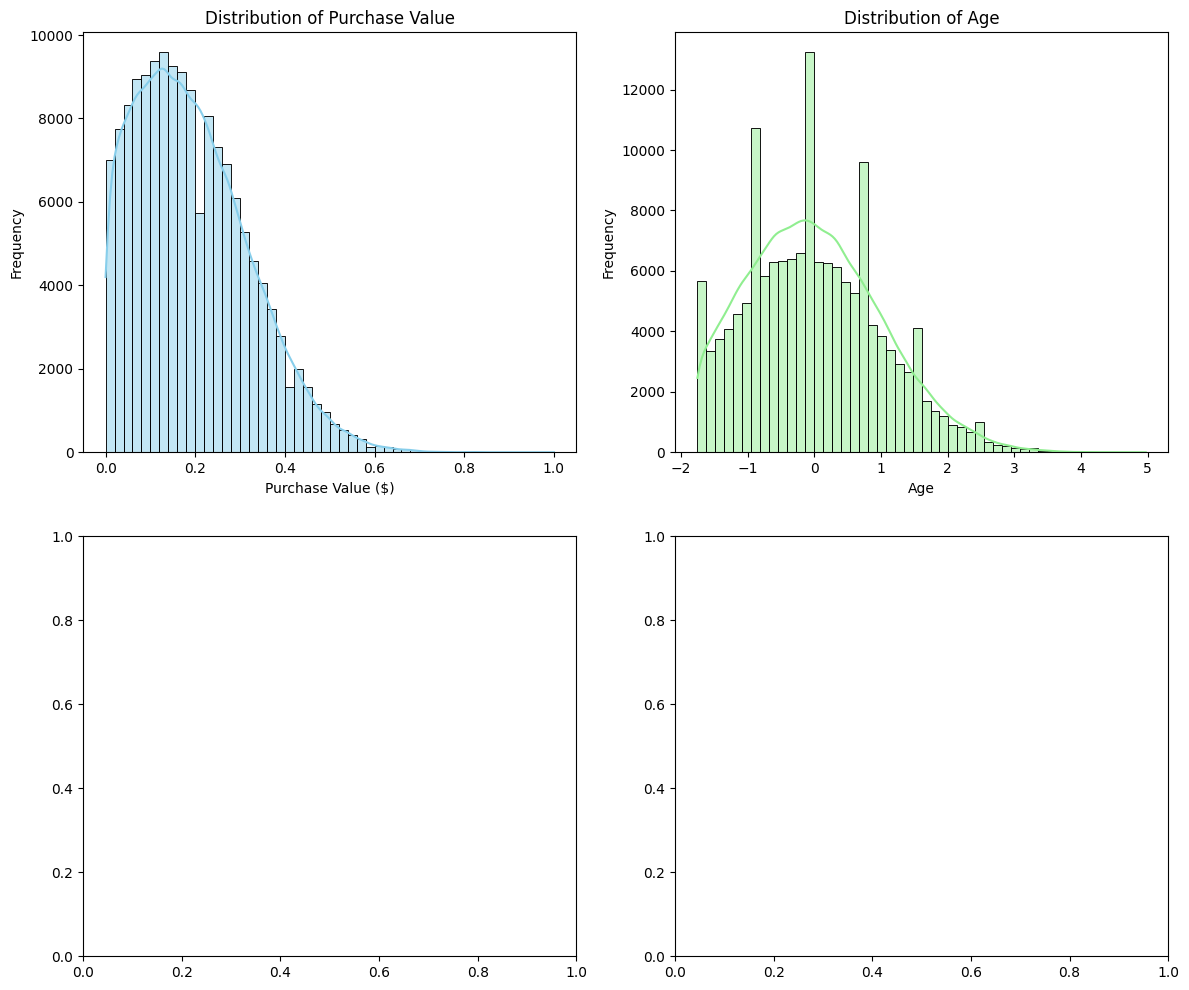

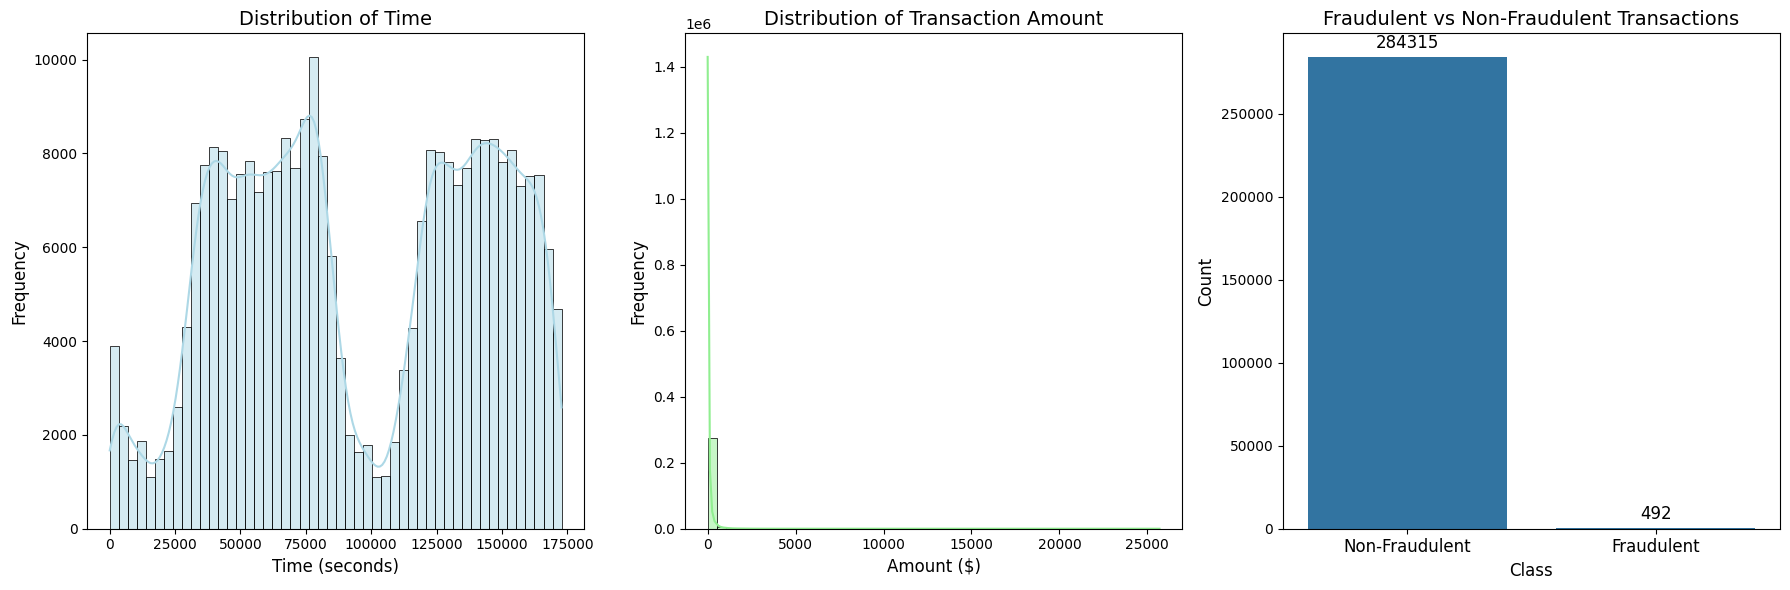

Successfully plotted creditcard_data distributions.

Plotting relationships in fraud_data...
Plotting Purchase Value vs Age...
Plotting Purchase Value vs Source...
Error plotting fraud_data relationships: Could not interpret value `source` for `x`. An entry with this name does not appear in `data`.

Performing correlation analysis...
Plotting Fraud Data heatmap and scatter plot...


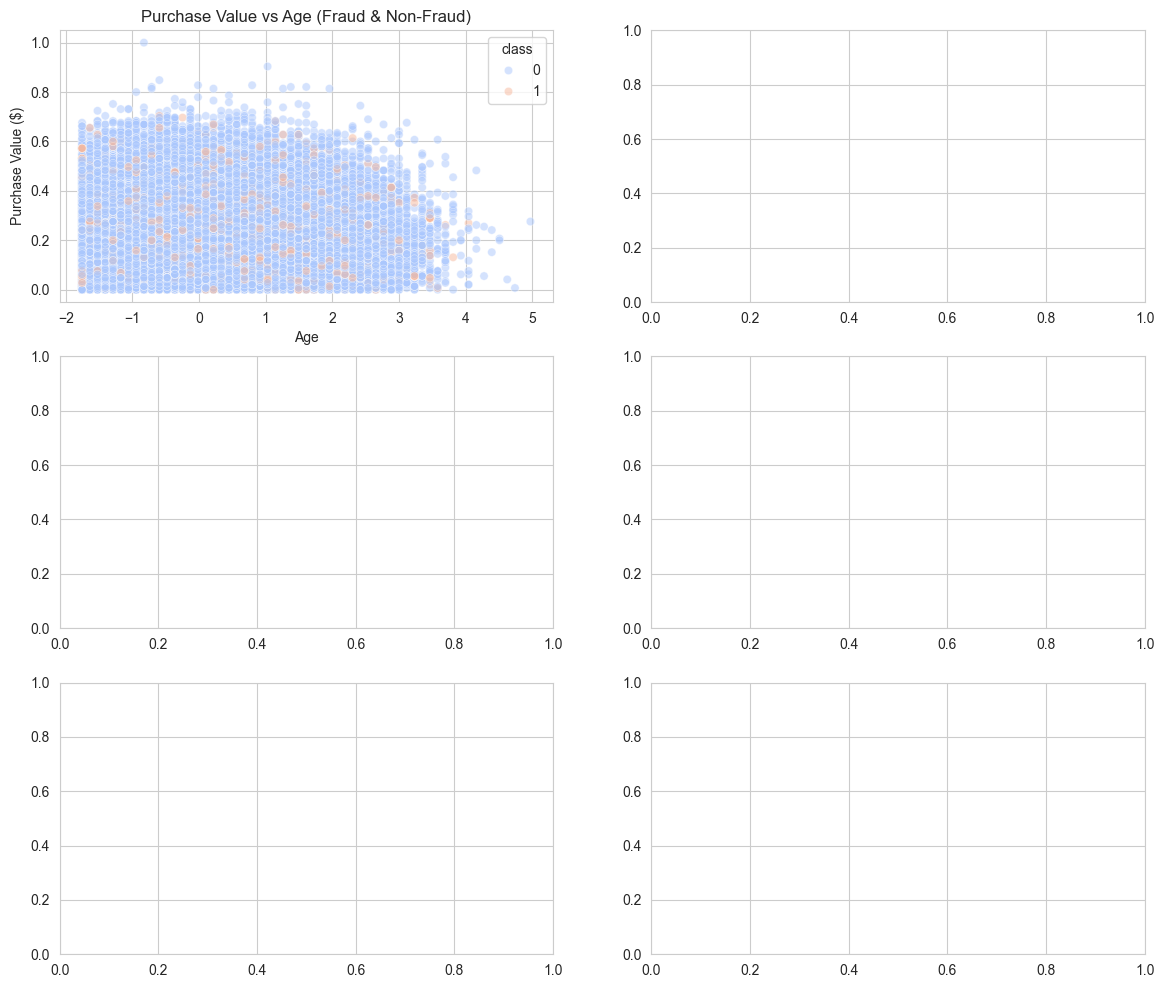

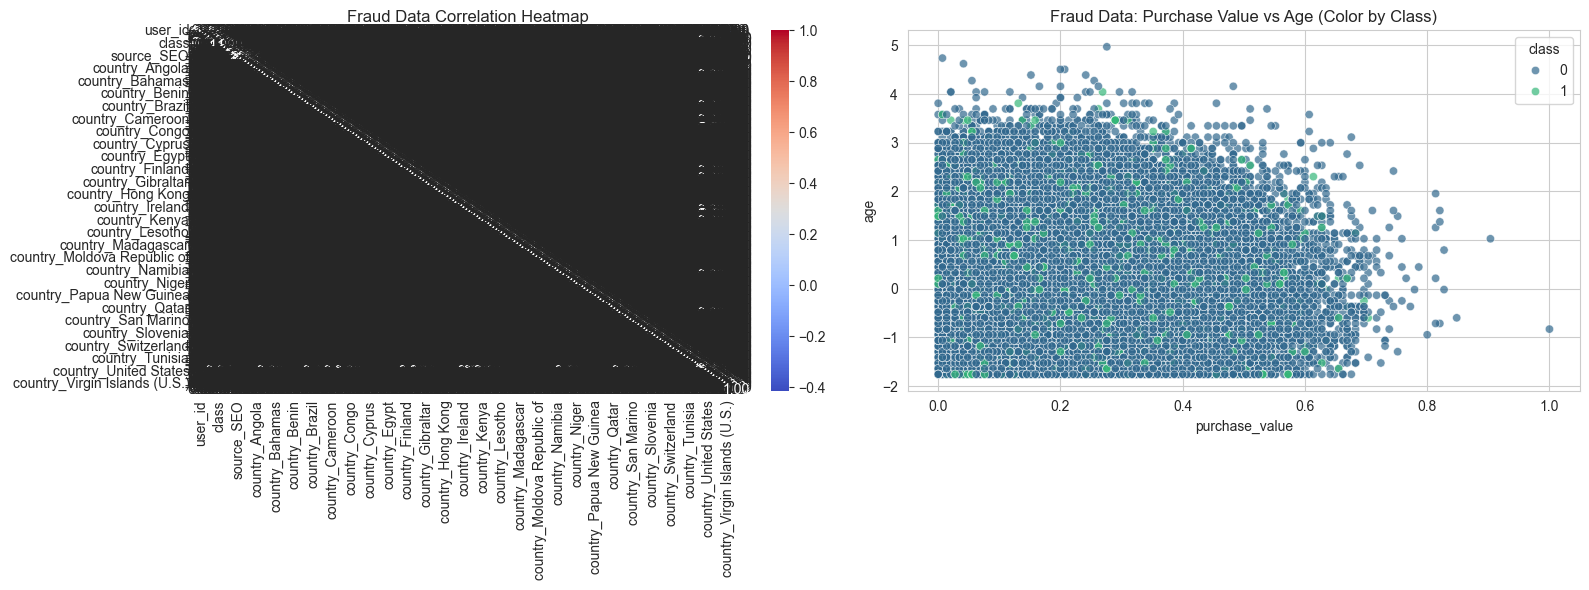

Plotting Credit Card Data heatmap...


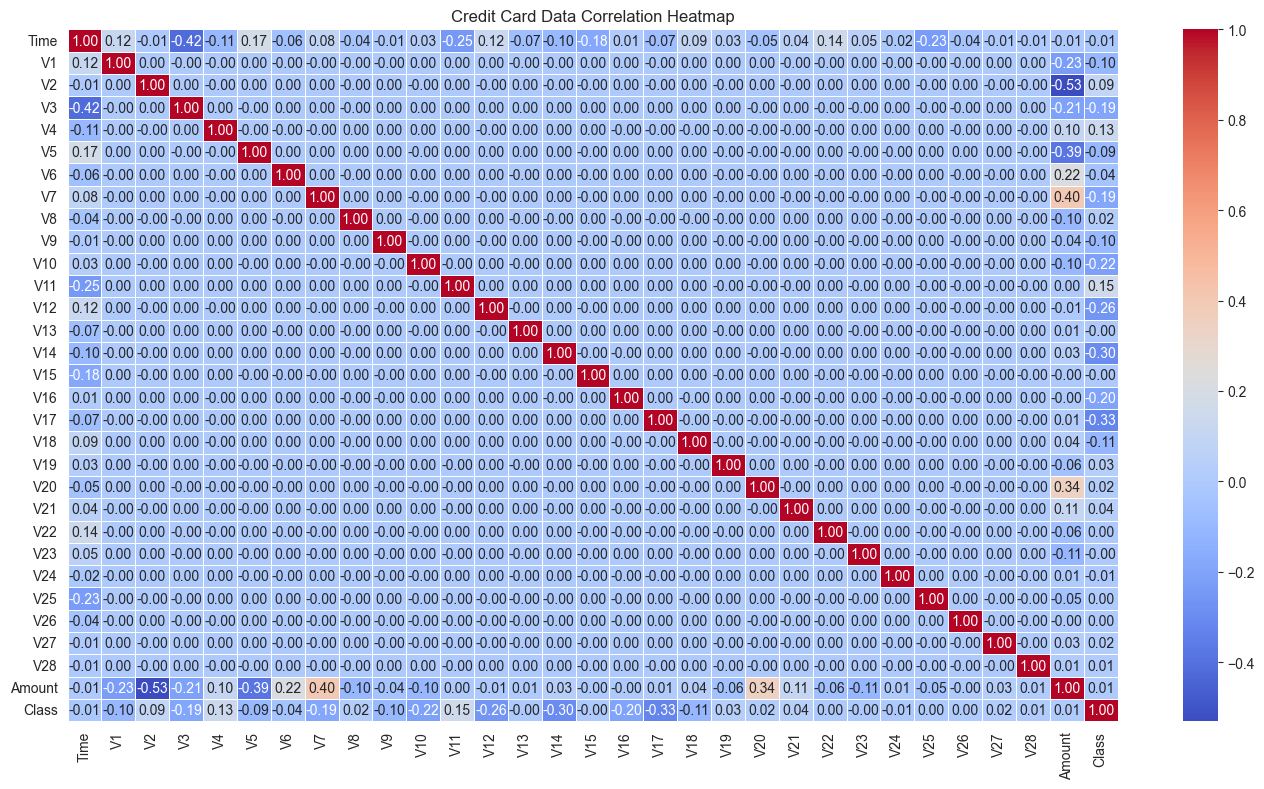

Successfully performed correlation analysis.

Mapping IP addresses to countries...
Successfully mapped IP addresses to countries.

Saving processed data to C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\Fraud_Data_Merged.csv...
Data successfully saved to C:\Users\fikad\Desktop\10acedamy\Fraud-Detection-Ecommerce-Banking1\Data\Fraud_Data_Merged.csv.

Exploratory data analysis (EDA) completed.


In [9]:
perform_eda(fraud_data, creditcard_data, ip_to_country, output_path)